In [35]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

input_folder = 'images'
output_folder = 'geometric_dists'
os.makedirs(output_folder, exist_ok=True)

In [36]:
def load_images_from_folder(folder):
    images = []
    filenames = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
            filenames.append(filename)
            
    return images, filenames

In [37]:
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

def translate_image(image, tx, ty):
    (h, w) = image.shape[:2]
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    translated = cv2.warpAffine(image, M, (w, h))
    return translated

def shear_image(image, shear_factor):
    (h, w) = image.shape[:2]
    M = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared = cv2.warpAffine(image, M, (w, h))
    return sheared

def flip_image(image, flip_code):
    flipped = cv2.flip(image, flip_code)
    return flipped

In [38]:
def display_images(images, distorted_images, titles):
    plt.figure(figsize=(15, 15))
    for i in range(len(images)):
        plt.subplot(len(images), len(distorted_images) + 1, i * (len(distorted_images) + 1) + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title("Original")
        plt.axis('off')
        
        for j in range(len(distorted_images)):
            plt.subplot(len(images), len(distorted_images) + 1, i * (len(distorted_images) + 1) + j + 2)
            plt.imshow(cv2.cvtColor(distorted_images[j][i], cv2.COLOR_BGR2RGB))
            plt.title(titles[j])
            plt.axis('off')
    plt.show()

In [39]:
def apply_transformations(images, rotation_angle=45, tx=100, ty=100, shear_factor=0.5, flip_code=1):
    rotated_images = []
    translated_images = []
    sheared_images = []
    flipped_images = []
    
    for image in images:
        rotated_images.append(rotate_image(image, rotation_angle))
        translated_images.append(translate_image(image, tx, ty))
        sheared_images.append(shear_image(image, shear_factor))
        flipped_images.append(flip_image(image, flip_code))

    return rotated_images, translated_images, sheared_images, flipped_images

apply transforms

In [40]:
images, filenames = load_images_from_folder(input_folder)

rotated_images, translated_images, sheared_images, flipped_images = apply_transformations(images)


save images

In [41]:
for i, filename in enumerate(filenames):
    cv2.imwrite(os.path.join(output_folder, f'rotated_{filename}'), rotated_images[i])
    cv2.imwrite(os.path.join(output_folder, f'translated_{filename}'), translated_images[i])
    cv2.imwrite(os.path.join(output_folder, f'sheared_{filename}'), sheared_images[i])
    cv2.imwrite(os.path.join(output_folder, f'flipped_{filename}'), flipped_images[i])

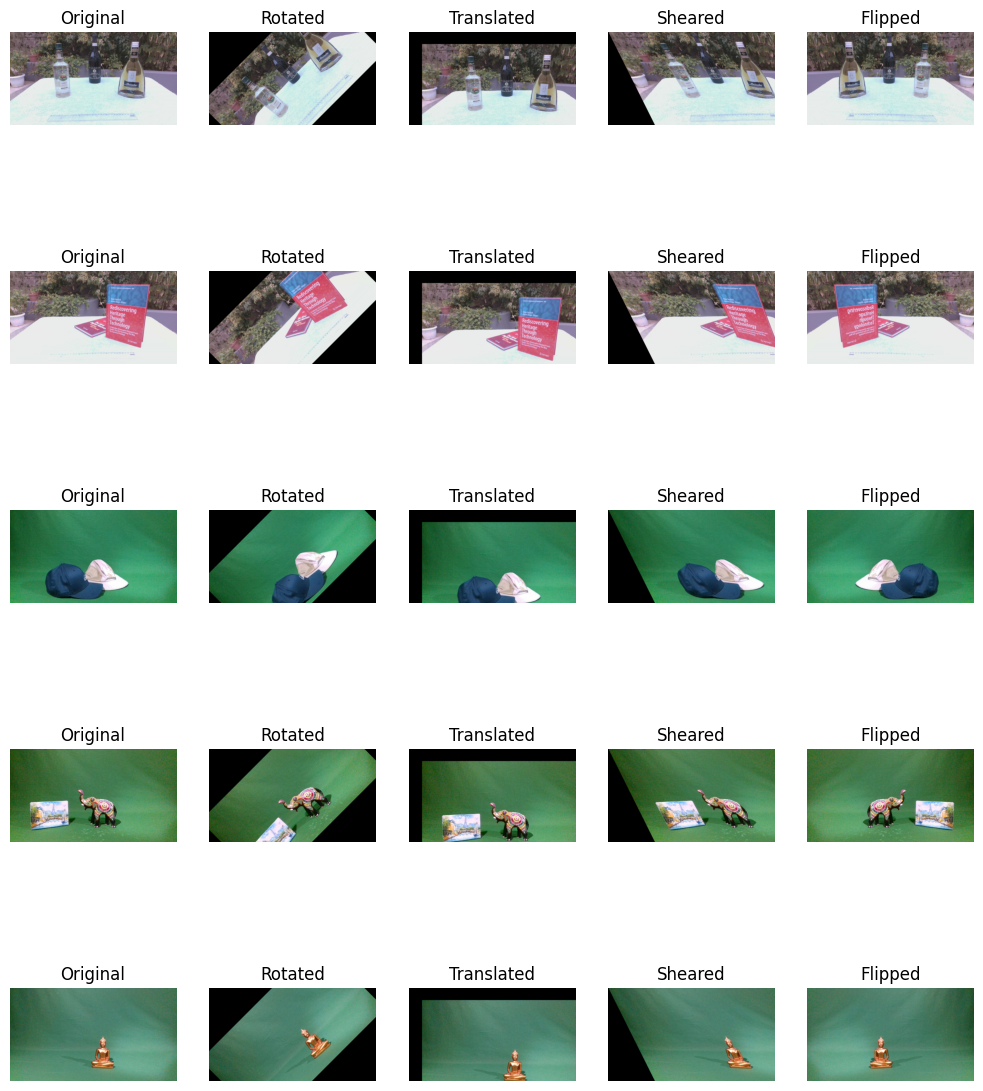

In [43]:
plt.figure(figsize=(15, 15))

for i in range(len(images)):
    plt.subplot(len(images), 6, i * 6 + 1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(len(images), 6, i * 6 + 2)
    plt.imshow(cv2.cvtColor(rotated_images[i], cv2.COLOR_BGR2RGB))
    plt.title("Rotated")
    plt.axis('off')
    
    plt.subplot(len(images), 6, i * 6 + 3)
    plt.imshow(cv2.cvtColor(translated_images[i], cv2.COLOR_BGR2RGB))
    plt.title("Translated")
    plt.axis('off')
    
    plt.subplot(len(images), 6, i * 6 + 4)
    plt.imshow(cv2.cvtColor(sheared_images[i], cv2.COLOR_BGR2RGB))
    plt.title("Sheared")
    plt.axis('off')
    
    plt.subplot(len(images), 6, i * 6 + 5)
    plt.imshow(cv2.cvtColor(flipped_images[i], cv2.COLOR_BGR2RGB))
    plt.title("Flipped")
    plt.axis('off')